In [2]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *

Autosaving every 300 seconds


## Approximation de la dérivée seconde
Montrer que pour $f$ régulière de $\mathbb R$ dans  $\mathbb R$,
$$
f^{\prime \prime}(x_0) = \frac {f(x_0-h)-2f(x_0)+f(x_0+h)}{h^2}+\mathcal O(h^2).
$$

Soit $f$ une fonction $\mathcal C^4(\mathbb R,\mathbb R)$ :

Calculons le développement limité de $f$ en un point $x_0 \in \mathbb R$ pour les deux accroissements suivants:

$f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2}f''(x_0)+\frac{h^3}{6}f'''(x_0)+\mathcal O(h^4)$ 

$f(x_0-h)=f(x_0)-hf'(x_0)+\frac{h²}{2}f''(x_0)-\frac{h^3}{6}f'''(x_0)+\mathcal O(h^4)$. 

Par sommation, on obtient :
$$f(x_0+h)+f(x_0-h)=2f(x_0)+\frac{h^2}{2}f''(x_0)+\mathcal O(h^4) .$$
On en déduit que (on notera la division par $h^2$ dans le terme de reste)
$$f^{\prime \prime}(x_0) = \frac {f(x_0-h)-2f(x_0)+f(x_0+h)}{h^2}+\mathcal O(h^2) $$

## Une tige encastrée
On considère une tige de longueur $L$ encastrée aux extrémités. On note $x$ l'abscisse curviligne le long de la tige $(0\le x\le L)$. Cette tige est soumise à des efforts verticaux le long de la tige, modélisés par une fonction $f\in \mathcal C^0([0,L],\mathbb R)$. La déformation de la tige selon la verticale est représentée par la fonction déplacement $u\in \mathcal C^2([0,L],\mathbb R)$, elle répond à l'équation suivante,
$$
\begin{cases}
-u''(x)=f(x), ~\forall x \in [0,L],\\
u(0)=u(L)=0, \text {(condition d'encastrement).}
\end {cases}
$$
Montrer que la fonction
$$
-\int_0^x\int_0^t f(s)\,dsdt+\frac x L\int_0^L\int_0^t f(s)\,dsdt
$$
est solution du problème. 
Montrer que c'est la seule.



Démarche: dériver deux fois l'expression $v$ proposée et constater que $v''=-f$. 

Puis vérifier que les 2 conditions d'encastrement sont satisfaites.

Ainsi, la solution proposée satisfait le problème.

Pou prouver l'unicité, on suppose que $u_1$ et $u_2$ sont solutions. On note $w=u_1-u_2$. On vérifie que $w''=0$ et que $w(0)=w(L)=0$. On en déduit que $w$ est affine ($w(x)=ax+b$) et s'annule en deux points distincts, d'où $a=b=0$.

On suppose que $f(x)=e^x\sin(x)$ et $L=2$. A l'aide de la commande integrate en calcul formel (librairie sympy), donner l'expression analytique de $u$ et tracer la solution sur $[0,2]$.

-x/2 + x*(3/2 - exp(2)*cos(2)/2)/2 + exp(x)*cos(x)/2 - 1/2


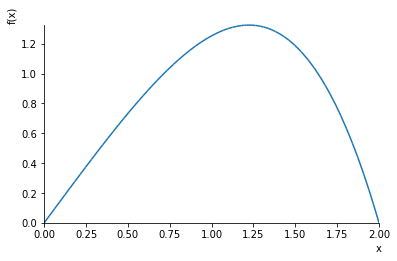

In [9]:
import sympy as sy
s, t, x = sy.symbols('s t x')
f=sy.exp(s)*sy.sin(s)
g=sy.integrate(f,(s,0,t))
h=sy.integrate(g,(t,0,x))
g2=sy.integrate(f,(s,0,t))
h2=sy.integrate(g2,(t,0,2))

uex= -h+(x/2)*h2
print(uex)
sy.plot(uex,(x,0,2))

## Approximation du problème
On propose une technique d'approximation pour calculer le déplacement de la tige. On note $x_i=ih$ les points de subdivisions de la tige, avec $h=\frac L {N+1}$, soit $N+2$ points équirépartis pour couvrir la tige extrémités comprises.

On propose d'écrire pour les $N$ points internes à la tige,

$$-u''(x_i)=\frac {-u(x_i-h)+2u(x_i)-u(x_i+h)}{h^2}+\mathcal O(h^2)=f(x_i).$$

On note alors $u_i\sim u(x_i)$ qui satisfait,
$$
\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}=f(x_i),~1\le i\le N,
$$
avec $u_0=u_{N+1}=0$.

Pourquoi a-t-on le système suivant?
$$
\frac 1 {h^2}\left (\matrix{
2&-1&0&-&-&-&0\\
-1&2&-1&0&-&-&0\\
0&-1&2&-1&0&-&0\\
-&-&-&-&-&-&-\\
0&-&0&-1&2&-1&0\\
0&0&-&0&-1&2&-1\\
0&0&-&-&0&-1&2\\
}\right)
\left (\matrix{u_1\\u_2\\-\\-\\-\\u_{N-1}\\u_N}\right)=\left (\matrix{f(x_1)\\f(x_2)\\-\\-\\-\\f(x_{N-1})\\f(x_N)}\right)
$$

Coder la résolution de ce système pour $N=100$ après avoir renseigné la matrice et le second membre du système.  
Représenter le graphe de la solution approchée à l'aide des points $(x_i,u_i)_{1\le i \le N}$.

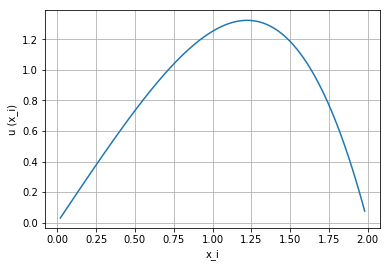

In [24]:
L=2
N=100
h=L/(1+N)
def f(x):
    return exp(x)*sin(x) 
A=h**-2*(2*eye(N)+diag(-1*ones(N-1),1)+diag(-1*ones(N-1),-1)) 
x=h*arange(1,N+1)
sm=f(x)

U=linalg.solve(A,sm)

plot(x , U )
plt.xlabel("x_i")
plt.ylabel("u (x_i)")
plt.grid()

Comparer la solution discrète $(x_i,u_i)_{1\le i \le N}$ au graphe de la fonction $u$ calculée de façon exacte. 

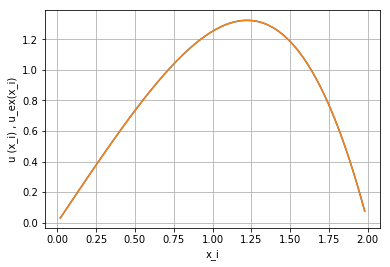

In [25]:
def u_exacte(x):
    return -x/2+x*(3/2-exp(2)*cos(2)/2)/2+exp(x)*cos(x)/2 - 1/2

U_EX=u_exacte(x)
plot(x , U ,x,U_EX)
plt.xlabel("x_i")
plt.ylabel("u (x_i) , u_ex(x_i)")
plt.grid()

Les deux graphes sont confondus à l'oeil nu. On va représenter la différence entre solution approchée et exacte.

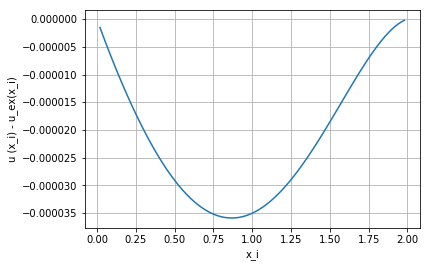

In [26]:
plot(x , U - U_EX)
plt.xlabel("x_i")
plt.ylabel("u (x_i) - u_ex(x_i)")
plt.grid()

Calculer l'erreur entre la solution exacte et approchée pour la norme $l^\infty(\mathbb R^N)$, c'est à dire, $\max_{1\le i \le N}|u_i-u(x_i)|$ lorsque $N=20$, $N=40$, $N=80$, $N=160$.

Comment se comporte l'erreur en fonction de $N$? Pouvait-on s'en douter?

In [27]:
def erreur(N):
    h=L/(1+N)
    A=h**-2*(2*eye(N)+diag(-1*ones(N-1),1)+diag(-1*ones(N-1),-1)) 
    x=h*arange(1,N+1)
    sm=f(x)
    U=linalg.solve(A,sm)
    U_EX=u_exacte(x)
    return max(abs(U-U_EX))

In [32]:
print([erreur(20*2**p) for p in range(4)])

[0.0008315858751177796, 0.00021787334107026268, 5.580586632447648e-05, 1.4124348838961964e-05]


On constate que l'erreur est grossièrement divisée par 4 lorsqu'on double $N$, ce qui revient à diviser $h$ par $2$. Cela suggère que l'erreur se comporte comme $h^2$ et est conforme avec l'approximation de la formule de différence finie.